# Problem Definition

<div class="alert alert-block alert-info">
PowerCo is a major gas and electricity utility that supplies to corporate, SME (Small & Medium Enterprise), and residential customers. The power-liberalization of the energy market in Europe has led to significant customer churn, especially in the SME segment.
<br>
<br>
A fair hypothesis is that price changes affect customer churn. Therefore, it is helpful to know which customers are more (or less) likely to churn at their current price, for which a good predictive model could be useful.
<br>
<br>
Moreover, for those customers that are at risk of churning, a discount might incentivize them to stay with our client. The head of the SME division is considering a 20% discount that is considered large enough to dissuade almost anyone from churning (especially those for whom price is the primary concern)

</div>

<div class="alert alert-block alert-success">
    This problem is mainly a data science prediction problem. Through analyzing the data(<b>The client data and the Prices data</b>), understanding deeper insights it holds and modelling this data will enable us to build a classification model able to predict whether the customer is likely to churn.
Our approach will be following the crisp DM model beginning with understanding the business, understanding the data, preparing the data for modelling, building our model then evaluating it and giving the final report.
</div>

# Business Understanding

Let us begin with The features description in both of the datasets we will be working on in this project

### Client Data Features Description

●	id = client company identifier
<br>
●	activity_new = category of the company’s activity
<br>
●	channel_sales = code of the sales channel
<br>
●	cons_12m = electricity consumption of the past 12 months
<br>
●	cons_gas_12m = gas consumption of the past 12 months
<br>
●	cons_last_month = electricity consumption of the last month
<br>
●	date_activ = date of activation of the contract
<br>
●	date_end = registered date of the end of the contract
<br>
●	date_modif_prod = date of the last modification of the product
<br>
●	date_renewal = date of the next contract renewal
<br>
●	forecast_cons_12m = forecasted electricity consumption for next 12 months
<br>
●	forecast_cons_year = forecasted electricity consumption for the next calendar year
<br>
●	forecast_discount_energy = forecasted value of current discount
<br>
●	forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months
<br>
●	forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)
<br>
●	forecast_price_energy_peak = forecasted energy price for 2nd period (peak)
<br>
●	forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)
<br>
●	has_gas = indicated if client is also a gas client<br>
●	imp_cons = current paid consumption<br>
●	margin_gross_pow_ele = gross margin on power subscription<br>
●	margin_net_pow_ele = net margin on power subscription<br>
●	nb_prod_act = number of active products and services<br>
●	net_margin = total net margin<br>
●	num_years_antig = antiquity of the client (in number of years)<br>
●	origin_up = code of the electricity campaign the customer first subscribed to<br>
●	pow_max = subscribed power<br>
●	churn = has the client churned over the next 3 months<br>


### Prices Data Features Description

●	id = client company identifier<br>
●	price_date = reference date<br>
●	price_off_peak_var = price of energy for the 1st period (off peak)<br>
●	price_peak_var = price of energy for the 2nd period (peak)<br>
●	price_mid_peak_var = price of energy for the 3rd period (mid peak)<br>
●	price_off_peak_fix = price of power for the 1st period (off peak)<br>
●	price_peak_fix = price of power for the 2nd period (peak)<br>
●	price_mid_peak_fix = price of power for the 3rd period (mid peak)<br>


## Exploratory Data Analysis

In [42]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

In [43]:
pd.set_option('display.max_columns',None)

Let's import our datasets

In [44]:
dfc = pd.read_csv("client_data.csv")
dfp = pd.read_csv("price_data.csv")

### General Overview

In [45]:
dfc.head(50)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
5,1aa498825382410b098937d65c4ec26d,usilxuppasemubllopkaafesmlibmsdf,8302,0,1998,2011-12-09,2016-12-09,2015-11-01,2015-12-10,796.94,1998,0.0,30.12,0.164775,0.086131,45.308378,f,181.21,33.12,33.12,1,118.89,4,lxidpiddsbxsbosboudacockeimpuepw,13.200,1
6,7ab4bf4878d8f7661dfc20e9b8e18011,foosdfpfkusacimwkcsosbicdxkicaua,45097,0,0,2011-12-02,2016-12-02,2011-12-02,2015-12-03,8069.28,0,0.0,0.00,0.166178,0.087538,44.311378,f,0.00,4.04,4.04,1,346.63,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,1
7,01495c955be7ec5e7f3203406785aae0,foosdfpfkusacimwkcsosbicdxkicaua,29552,0,1260,2010-04-21,2016-04-21,2010-04-21,2015-04-22,864.73,751,0.0,144.49,0.115174,0.098837,40.606701,f,70.63,53.92,53.92,1,100.09,6,lxidpiddsbxsbosboudacockeimpuepw,26.400,0
8,f53a254b1115634330c12c7fdbf7958a,usilxuppasemubllopkaafesmlibmsdf,2962,0,0,2011-09-23,2016-09-23,2011-09-23,2015-09-25,444.38,0,0.0,15.85,0.145711,0.000000,44.311378,f,0.00,12.82,12.82,1,42.59,4,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
9,10c1b2f97a2d2a6f10299dc213d1a370,lmkebamcaaclubfxadlmueccxoimlema,26064,0,2188,2010-05-04,2016-05-04,2015-04-29,2015-05-05,2738.10,2188,0.0,130.43,0.115761,0.099419,40.606701,f,219.59,33.42,33.42,1,329.60,6,lxidpiddsbxsbosboudacockeimpuepw,31.500,0


In [46]:
dfp.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [47]:
dfc.shape

(14606, 26)

In [48]:
dfp.shape

(193002, 8)

Our clients dataset has 14606 rows and 26 features whereas our prices dataset has 193002 rows and 8 features

In [49]:
dfc.duplicated(['id']).sum()

0

In [50]:
dfp.duplicated(["id"]).sum()

176906

In [51]:
len(dfc['id'].unique())

14606

In [52]:
len(dfp['id'].unique())

16096

we notice that we have ids of companies in the prices dataset not present in the clients dataset. we will work on this later on

### Missing Values

<AxesSubplot:>

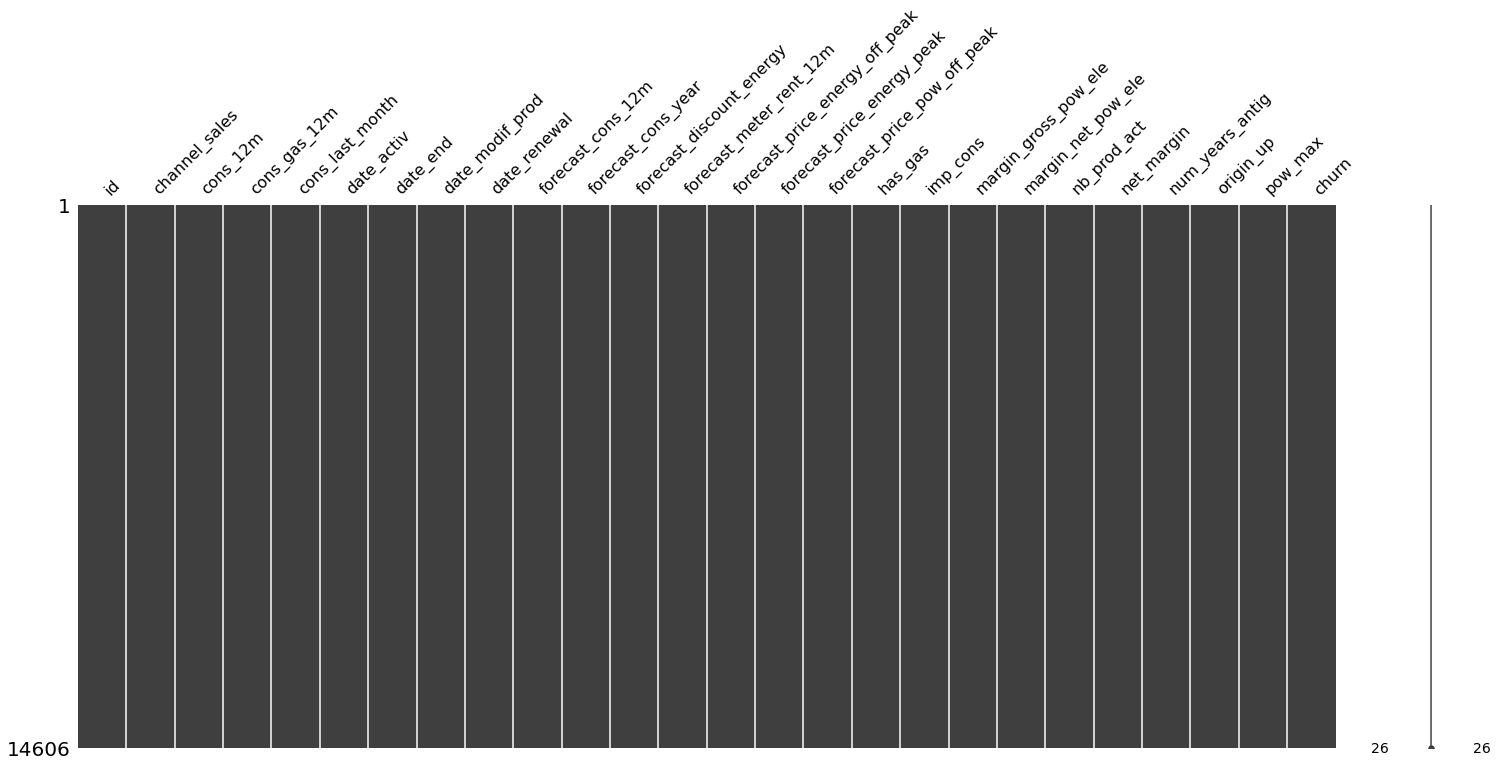

In [53]:
msno.matrix(dfc)

<AxesSubplot:>

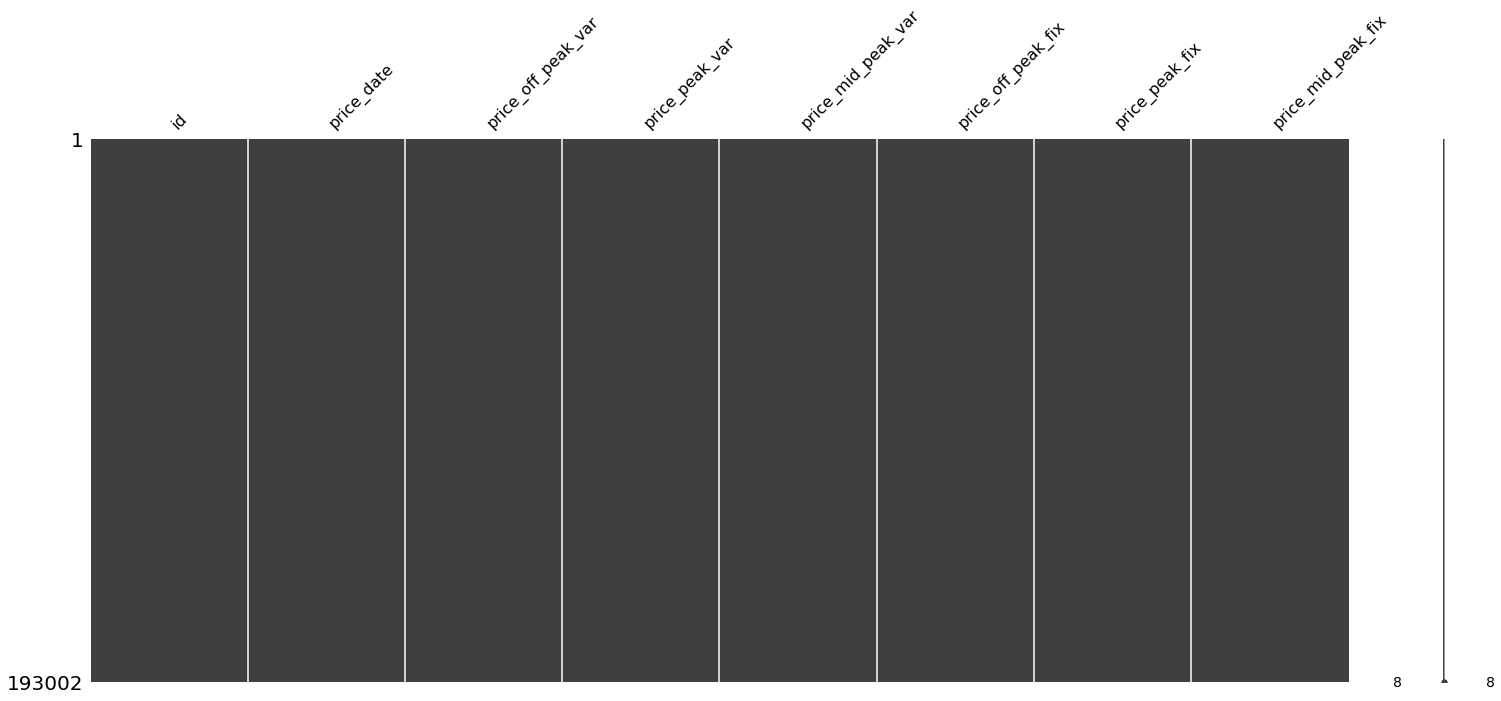

In [54]:
msno.matrix(dfp)

In [55]:
res = dfc.isin(['MISSING']).any().any()
if res:
    print("there are missing values in our dataset")
else:
    print("there are no missning values in our dataset")

there are missing values in our dataset


In [56]:
res = dfc.isin(['MISSING']).any()

In [57]:
res

id                                False
channel_sales                      True
cons_12m                          False
cons_gas_12m                      False
cons_last_month                   False
date_activ                        False
date_end                          False
date_modif_prod                   False
date_renewal                      False
forecast_cons_12m                 False
forecast_cons_year                False
forecast_discount_energy          False
forecast_meter_rent_12m           False
forecast_price_energy_off_peak    False
forecast_price_energy_peak        False
forecast_price_pow_off_peak       False
has_gas                           False
imp_cons                          False
margin_gross_pow_ele              False
margin_net_pow_ele                False
nb_prod_act                       False
net_margin                        False
num_years_antig                   False
origin_up                          True
pow_max                           False


In [58]:
dfc[dfc['channel_sales']=='MISSING']

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
14,c5037389dd8be351d3c40f2973da2391,MISSING,9707,0,0,2010-12-01,2016-12-01,2010-12-01,2015-12-02,1028.52,0,0.0,15.37,0.168242,0.089602,45.308378,f,0.00,15.78,15.78,1,111.59,5,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
16,bd14bbac3aca710ee5288fcd8511d4bb,MISSING,786536,80583,85883,2010-02-15,2016-02-15,2010-02-15,2015-02-16,13517.50,23298,0.0,16.60,0.164058,0.086163,44.311378,t,2585.38,25.68,25.68,2,1087.76,6,lxidpiddsbxsbosboudacockeimpuepw,11.400,0
18,f2b93783adecf0d0d8d60ab547bda3de,MISSING,24838,0,2877,2011-05-27,2016-05-27,2011-05-27,2015-05-31,1088.35,798,0.0,141.79,0.115174,0.098837,40.606701,f,79.36,21.57,21.57,1,117.44,5,ldkssxwpmemidmecebumciepifcamkci,15.001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14585,cf8fdee748705aacc79b92eca825218f,MISSING,1185,0,0,2009-06-08,2016-06-08,2009-06-08,2015-06-12,176.56,0,0.0,7.59,0.144902,0.000000,44.311378,f,0.00,21.52,21.52,1,16.13,7,ldkssxwpmemidmecebumciepifcamkci,13.200,0
14594,9c93ea61edcaddf27333bc25178e760f,MISSING,6694,0,0,2011-12-01,2016-12-01,2015-11-01,2015-12-02,1007.35,0,0.0,15.98,0.144039,0.000000,45.308378,f,0.00,15.78,15.78,1,86.54,4,ldkssxwpmemidmecebumciepifcamkci,13.856,0
14595,a6096551a64c47cd240c356b0669f892,MISSING,11563,0,0,2010-02-08,2016-02-08,2015-12-16,2015-02-09,1384.83,0,0.0,16.16,0.164641,0.086742,44.311378,f,0.00,31.20,31.20,1,122.35,6,ldkssxwpmemidmecebumciepifcamkci,13.856,0
14598,1582ef35fbfa265e60bb3399bdebac87,MISSING,9441,0,480,2009-10-08,2016-10-08,2015-05-24,2015-10-09,983.97,480,0.0,132.11,0.115237,0.100123,40.939027,f,46.98,20.00,20.00,1,113.17,6,ldkssxwpmemidmecebumciepifcamkci,15.001,0


In [59]:
dfc[dfc['origin_up']=='MISSING']

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
17,4e4a34a6d91ff25d0fdf68733907ad44,foosdfpfkusacimwkcsosbicdxkicaua,30776,0,0,2011-08-01,2016-07-25,2014-07-25,2015-07-27,3045.16,0,0.0,118.24,0.112860,0.096521,40.606701,f,0.00,19.29,19.29,1,335.78,5,MISSING,25.000,0
158,01fbea88102b46f036ff17ebe4d23459,lmkebamcaaclubfxadlmueccxoimlema,15040,4383,0,2010-05-07,2016-04-16,2015-04-15,2015-04-17,1625.53,0,0.0,116.84,0.117496,0.101155,40.606701,t,0.00,30.18,30.18,2,204.98,6,MISSING,25.000,0
357,9c4bde81b5b4913b46c28986b39be5ae,MISSING,30513,0,2294,2008-02-11,2016-02-11,2014-05-05,2015-02-12,3081.42,2294,0.0,131.43,0.116900,0.100015,40.606701,f,225.73,49.44,49.44,1,321.18,8,MISSING,33.000,0
499,f1d5af5e1fff4c8acaac81dce31028d0,MISSING,17855,315,0,2012-04-02,2016-06-01,2015-06-01,2015-04-04,658.67,0,0.0,18.37,0.199230,0.000000,45.806878,t,0.00,37.74,37.74,3,240.86,4,MISSING,12.000,0
1094,66ba1d7066c1d430cc17974387c10b25,ewpakwlliwisiwduibdlfmalxowmwpci,2501,0,0,2012-12-06,2016-12-06,2015-11-01,2015-12-07,287.81,0,0.0,0.00,0.144038,0.000000,46.305378,f,0.00,27.28,27.28,1,21.84,3,MISSING,13.856,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12762,c854b26113307311c6dd2319ed1f613d,foosdfpfkusacimwkcsosbicdxkicaua,1141,0,9,2012-08-30,2016-05-08,2015-11-25,2015-05-13,98.14,9,0.0,95.87,0.112860,0.096521,40.606701,f,0.91,31.41,31.41,1,31.93,3,MISSING,17.321,0
13244,08194f6221bfc93f6b174f4f3194db42,MISSING,4,0,0,2010-10-21,2016-10-21,2010-10-21,2015-10-23,0.60,0,0.0,18.62,0.147506,0.000000,46.305378,f,0.00,28.76,28.76,1,0.04,5,MISSING,13.856,0
13314,4dbafe448d59092e174999b04b97b20f,MISSING,17493,0,1901,2010-11-05,2017-01-11,2016-01-11,2015-11-05,1590.92,1901,0.0,136.52,0.096347,0.088776,58.995952,f,159.84,0.00,0.00,1,204.66,5,MISSING,10.000,0
14228,adff89602e947091aa5adc5e39f2b146,lmkebamcaaclubfxadlmueccxoimlema,25551,0,1891,2011-09-16,2016-09-15,2011-09-16,2015-09-16,20.80,209,0.0,188.91,0.115237,0.100123,41.271364,f,19.89,72.15,72.15,1,0.11,4,MISSING,35.000,0


Our main task here is to understand the influence of the prices on the customers churn. So to understand the correlations between these factors we need to join both of the dataframes in a way that we have the id of the customer in a row followed by their info and then their prices info

### Joining the dataframes

In [60]:
dfc.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [61]:
dfp.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


let's remove the rows of the prices dataframe that do not exist in the clients dataframe

In [62]:
id_clients = dfc['id'].unique().tolist()

In [63]:
dfp = dfp[dfp['id'].isin(id_clients)]

In [64]:
dfp.shape

(175149, 8)

let's now join both datasets

In [65]:
df = dfp.join(dfc.set_index('id'),on='id')

In [66]:
df.shape

(175149, 33)

In [67]:
df.head(20)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,630,0.0,19.59,0.143980,0.000000,44.311378,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,630,0.0,19.59,0.143980,0.000000,44.311378,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,630,0.0,19.59,0.143980,0.000000,44.311378,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,630,0.0,19.59,0.143980,0.000000,44.311378,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,630,0.0,19.59,0.143980,0.000000,44.311378,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
5,038af19179925da21a25619c5a24b745,2015-06-01,0.149626,0.000000,0.000000,44.266930,0.000000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,630,0.0,19.59,0.143980,0.000000,44.311378,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
6,038af19179925da21a25619c5a24b745,2015-07-01,0.150321,0.000000,0.000000,44.444710,0.000000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,630,0.0,19.59,0.143980,0.000000,44.311378,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
7,038af19179925da21a25619c5a24b745,2015-08-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,630,0.0,19.59,0.143980,0.000000,44.311378,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
8,038af19179925da21a25619c5a24b745,2015-09-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,630,0.0,19.59,0.143980,0.000000,44.311378,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
9,038af19179925da21a25619c5a24b745,2015-10-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,630,0.0,19.59,0.143980,0.000000,44.311378,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0


<AxesSubplot:>

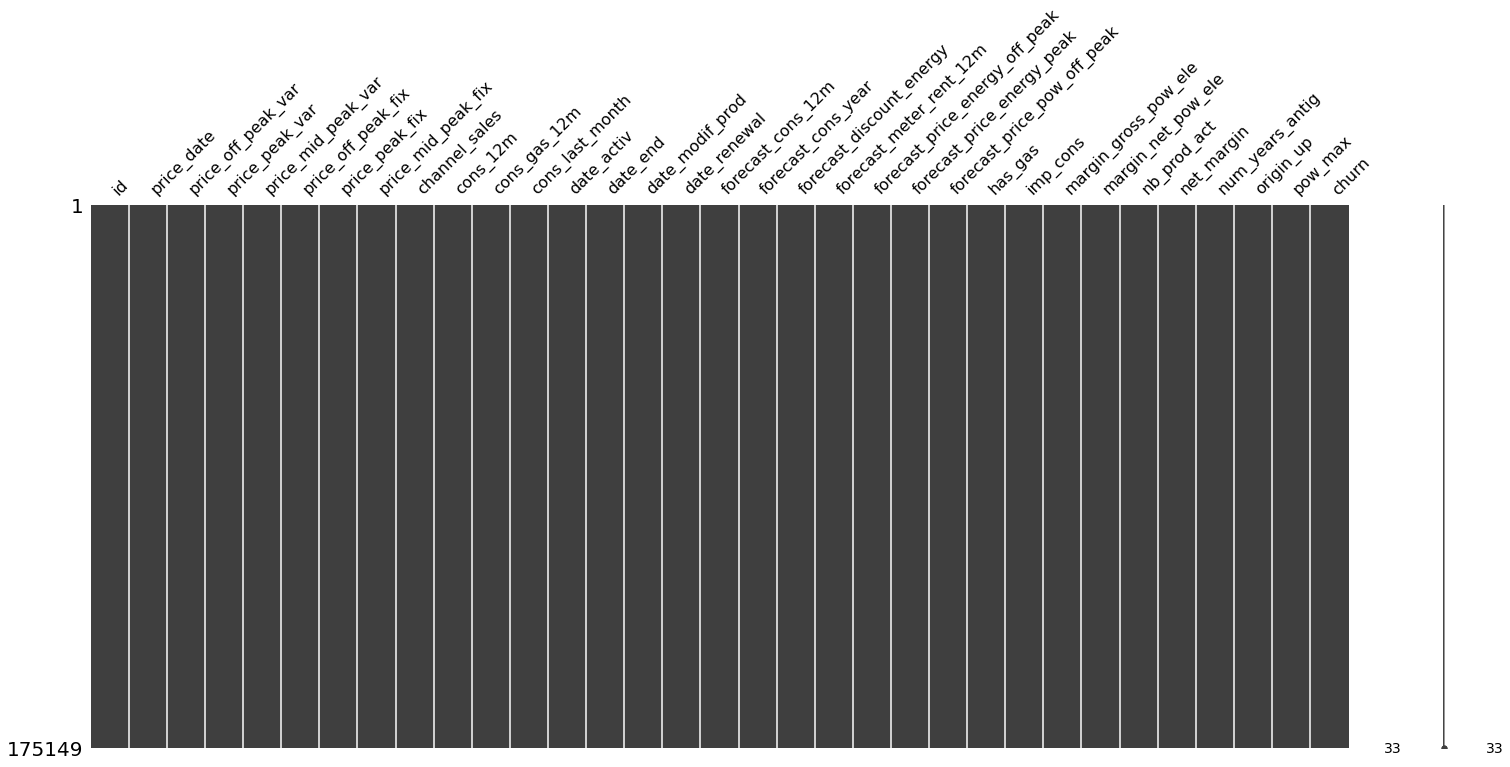

In [68]:
msno.matrix(df)

In [69]:
df.shape

(175149, 33)

In [70]:
cols = df.columns.tolist()

In [71]:
cols = ['id',
'channel_sales',
    'origin_up',
    'date_activ',
    'date_end',
'date_modif_prod',
'date_renewal',
    'has_gas',
    'num_years_antig',
'nb_prod_act',
    'pow_max',
    'cons_12m',
     'imp_cons',
'cons_gas_12m',
'cons_last_month',
'forecast_cons_12m',
'forecast_cons_year',
'forecast_discount_energy',
'forecast_meter_rent_12m',
'forecast_price_energy_off_peak',
'forecast_price_energy_peak',
'forecast_price_pow_off_peak',
'price_date',
'price_off_peak_var',
        'price_mid_peak_var',
'price_peak_var',

'price_off_peak_fix',
        'price_mid_peak_fix',
'price_peak_fix',

'margin_gross_pow_ele',
'margin_net_pow_ele',
'net_margin',
'churn']

In [72]:
df.reindex(cols,axis='columns')

,id,channel_sales,origin_up,date_activ,date_end,date_modif_prod,date_renewal,has_gas,num_years_antig,nb_prod_act,pow_max,cons_12m,imp_cons,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,price_date,price_off_peak_var,price_mid_peak_var,price_peak_var,price_off_peak_fix,price_mid_peak_fix,price_peak_fix,margin_gross_pow_ele,margin_net_pow_ele,net_margin,churn
0,038af19179925da21a25619c5a24b745,foosdfpfkusacimwkcsosbicdxkicaua,ldkssxwpmemidmecebumciepifcamkci,2013-06-03,2016-06-03,2015-04-29,2015-06-14,f,3,1,13.2,3576,91.82,0,630,531.50,630,0.0,19.59,0.14398,0.000000,44.311378,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.00000,21.52,21.52,52.53,0
1,038af19179925da21a25619c5a24b745,foosdfpfkusacimwkcsosbicdxkicaua,ldkssxwpmemidmecebumciepifcamkci,2013-06-03,2016-06-03,2015-04-29,2015-06-14,f,3,1,13.2,3576,91.82,0,630,531.50,630,0.0,19.59,0.14398,0.000000,44.311378,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.00000,21.52,21.52,52.53,0
2,038af19179925da21a25619c5a24b745,foosdfpfkusacimwkcsosbicdxkicaua,ldkssxwpmemidmecebumciepifcamkci,2013-06-03,2016-06-03,2015-04-29,2015-06-14,f,3,1,13.2,3576,91.82,0,630,531.50,630,0.0,19.59,0.14398,0.000000,44.311378,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.00000,21.52,21.52,52.53,0
3,038af19179925da21a25619c5a24b745,foosdfpfkusacimwkcsosbicdxkicaua,ldkssxwpmemidmecebumciepifcamkci,2013-06-03,2016-06-03,2015-04-29,2015-06-14,f,3,1,13.2,3576,91.82,0,630,531.50,630,0.0,19.59,0.14398,0.000000,44.311378,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.00000,21.52,21.52,52.53,0
4,038af19179925da21a25619c5a24b745,foosdfpfkusacimwkcsosbicdxkicaua,ldkssxwpmemidmecebumciepifcamkci,2013-06-03,2016-06-03,2015-04-29,2015-06-14,f,3,1,13.2,3576,91.82,0,630,531.50,630,0.0,19.59,0.14398,0.000000,44.311378,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.00000,21.52,21.52,52.53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,foosdfpfkusacimwkcsosbicdxkicaua,lxidpiddsbxsbosboudacockeimpuepw,2013-06-01,2017-06-01,2015-11-01,2015-06-23,f,3,1,15.1,26272,256.23,0,2505,2704.01,2505,0.0,129.61,0.11691,0.100572,40.606701,2015-08-01,0.119916,0.076257,0.102232,40.728885,16.291555,24.43733,13.80,13.80,325.43,0
192998,16f51cdc2baa19af0b940ee1b3dd17d5,foosdfpfkusacimwkcsosbicdxkicaua,lxidpiddsbxsbosboudacockeimpuepw,2013-06-01,2017-06-01,2015-11-01,2015-06-23,f,3,1,15.1,26272,256.23,0,2505,2704.01,2505,0.0,129.61,0.11691,0.100572,40.606701,2015-09-01,0.119916,0.076257,0.102232,40.728885,16.291555,24.43733,13.80,13.80,325.43,0
192999,16f51cdc2baa19af0b940ee1b3dd17d5,foosdfpfkusacimwkcsosbicdxkicaua,lxidpiddsbxsbosboudacockeimpuepw,2013-06-01,2017-06-01,2015-11-01,2015-06-23,f,3,1,15.1,26272,256.23,0,2505,2704.01,2505,0.0,129.61,0.11691,0.100572,40.606701,2015-10-01,0.119916,0.076257,0.102232,40.728885,16.291555,24.43733,13.80,13.80,325.43,0
193000,16f51cdc2baa19af0b940ee1b3dd17d5,foosdfpfkusacimwkcsosbicdxkicaua,lxidpiddsbxsbosboudacockeimpuepw,2013-06-01,2017-06-01,2015-11-01,2015-06-23,f,3,1,15.1,26272,256.23,0,2505,2704.01,2505,0.0,129.61,0.11691,0.100572,40.606701,2015-11-01,0.119916,0.076257,0.102232,40.728885,16.291555,24.43733,13.80,13.80,325.43,0


Now we have our final dataset with a shape of 175149 rows and 33 features. let's get on with exploring them

In [73]:
df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,630,0.0,19.59,0.14398,0.0,44.311378,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,630,0.0,19.59,0.14398,0.0,44.311378,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,630,0.0,19.59,0.14398,0.0,44.311378,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,630,0.0,19.59,0.14398,0.0,44.311378,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,630,0.0,19.59,0.14398,0.0,44.311378,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0


### Exploratory Data Analysis

Let's start visualizing our data and we will begin by determining the correlations between our features to further analyze them

In [74]:
px.histogram(data_frame=df,x='churn',color='churn')

Our dataset is highly imbalanced as we have nearly 1/8 of our customers churning and 7/8 who are not overall.

In [75]:
df_corr = df.corr()
matrix = np.triu(df_corr)

<AxesSubplot:>

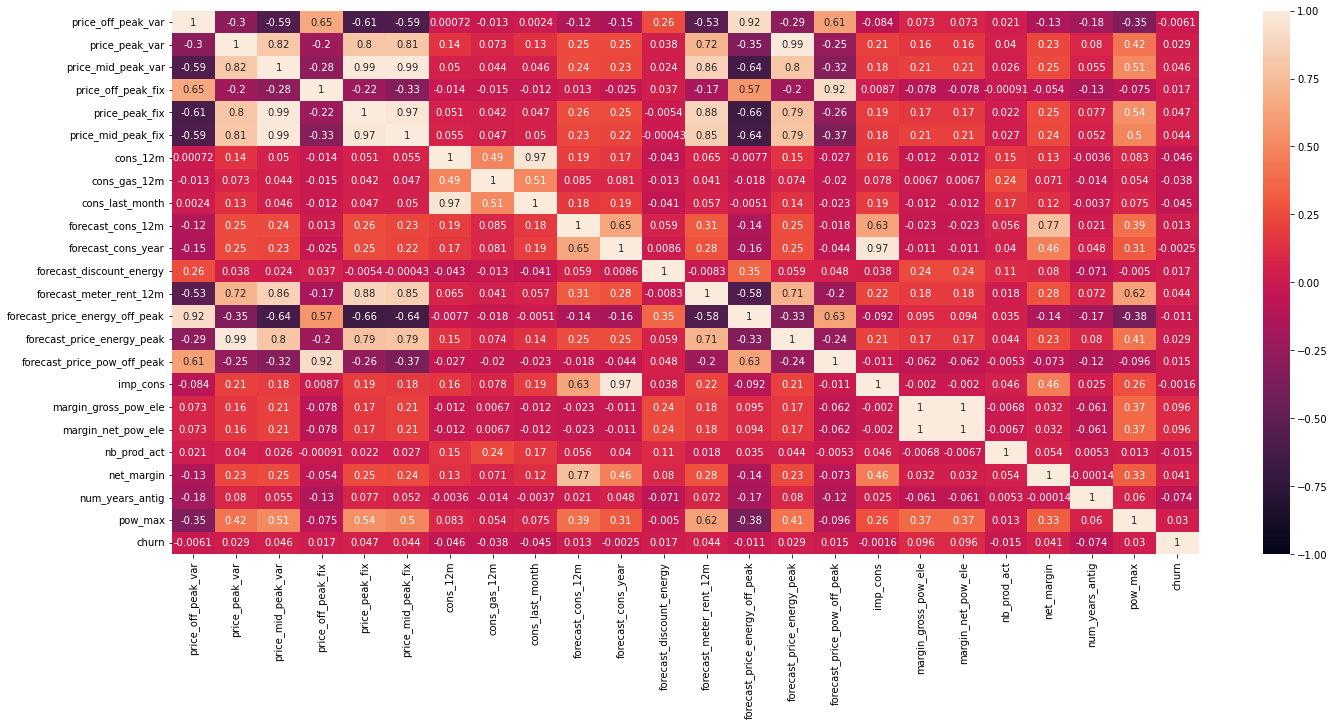

In [76]:
fig, ax = plt.subplots(figsize=(23,10)) 
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True,ax=ax)


1. we can notice a cluster of high positive and negative correlations between the prices of energy and power as these prices in the off peak, mid peak and peak depend on each other. for example we have a correlation equal to 0.97 between the prices of power mid peak and then peak. The higher mid peak prices the higher peak prices will be. On the other hand we have a negative correlation equal to -0.61 between peak price of power and off peak price of energy meaning that the higher prices of power in the peak the lower the prices of energy will be in the off peak and vice versa.
<br>
<br>
2. Looking at the cluster of the prices and the forecasts of these prices we can conclude that we have an overall highly positive correlation between these features except the energy price forcast off peak
<br>
<br>
3. On the other hand we notice also a high positive correlation between the current paid consumption and the forcast consumption of the year. a high positive correlation between the consumption of the last month and 12 month. We can also detect that the net_margin is moderately correlated to the forecast consumption 12 month which makes it accurate

In [77]:
df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,630,0.0,19.59,0.14398,0.0,44.311378,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,630,0.0,19.59,0.14398,0.0,44.311378,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,630,0.0,19.59,0.14398,0.0,44.311378,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,630,0.0,19.59,0.14398,0.0,44.311378,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,630,0.0,19.59,0.14398,0.0,44.311378,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0


In [78]:
sns.scatterplot(x="cons_12m", y="forecast_cons_12m",
             hue="churn",
             data=df)

<AxesSubplot:xlabel='cons_12m', ylabel='forecast_cons_12m'>

Error in callback <function flush_figures at 0x0000013E30E47160> (for post_execute):


KeyboardInterrupt: 

This chart showcases the inaccuracy of the  forcasted consumption in the past 12 months compared to the actual consumption in the last 12 months

<AxesSubplot:xlabel='imp_cons', ylabel='forecast_cons_year'>

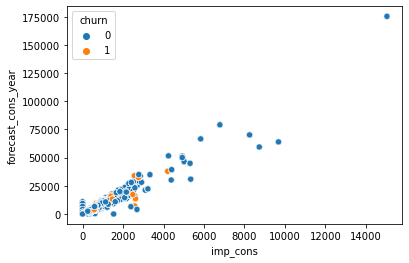

In [79]:
sns.scatterplot(x="imp_cons", y="forecast_cons_year",
             hue="churn",
             data=df)

we can clearly see here the linearity in the paid consumption and the forcasted consumption in a year

<AxesSubplot:xlabel='num_years_antig', ylabel='cons_12m'>

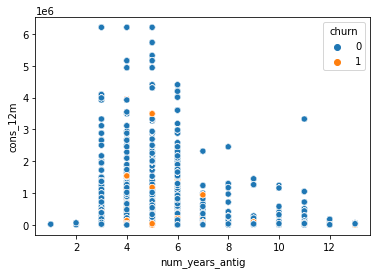

In [80]:
sns.scatterplot(x="num_years_antig", y="cons_12m",
             hue="churn",
             data=df)

The antiquity of the customers reflect their consumption and as we can see the density of the consumption is overall located in those who have been customers for 3-6 years

In [81]:
df['price_peak_var'].value_counts()

0.000000    83616
0.103395     5019
0.105428     4646
0.100491     4036
0.106863     2807
            ...  
0.101077        1
0.100496        1
0.093823        1
0.093327        1
0.083939        1
Name: price_peak_var, Length: 968, dtype: int64

0    158146
1     17003
Name: churn, dtype: int64


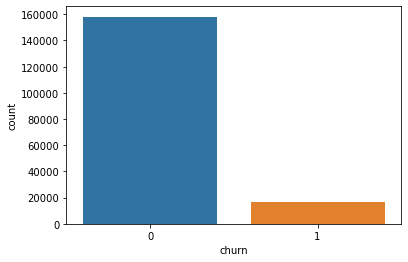

In [84]:
sns.countplot(data=df,x='churn')
print(df.churn.value_counts())